In [1]:
import pycocotools
import os
import numpy as np
import pandas as pd
import tifffile as tiff
import cv2

import torch
import torchvision
import torch.utils.data
from PIL import Image, ImageDraw

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from engine import train_one_epoch, evaluate
import utils
import transforms as T

from torchvision.transforms import ToPILImage  

In [17]:
df = pd.read_csv('../CSVs/preds_clean.csv')

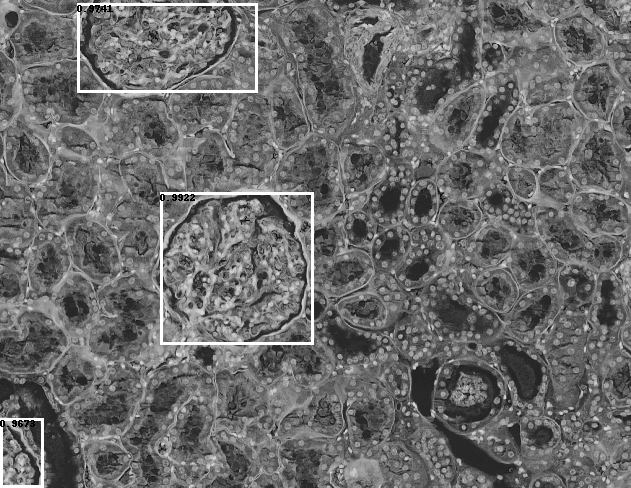

In [33]:
idx = 2635

img_id = df.loc[idx][0]
img_path = os.path.join('../test/slices', img_id)
img = tiff.imread(img_path)

# turn the test images from tensor arrays to PIL image
x = img*255
image = ToPILImage()(x) 

# draw the boxes around the predicted glomeruli, return the image
draw = ImageDraw.Draw(image)

for ele in range(len(eval(df.loc[idx]['boxes']))-1):
    boxes = eval(df.loc[idx]['boxes'])[ele]
    score = eval(df.loc[idx]["scores"])[ele]
    score = float(score)
    
    if score > 0.91:
        draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
        outline ='white', width =3)
        draw.text((boxes[0], boxes[1]), text = str(score))

image